In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Titanic.csv')
df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

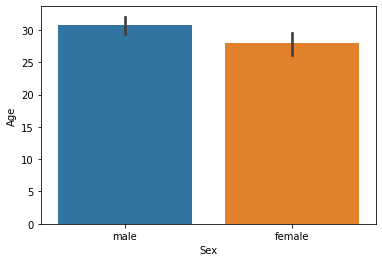

In [7]:
sb.barplot(x='Sex', y='Age', data=df)

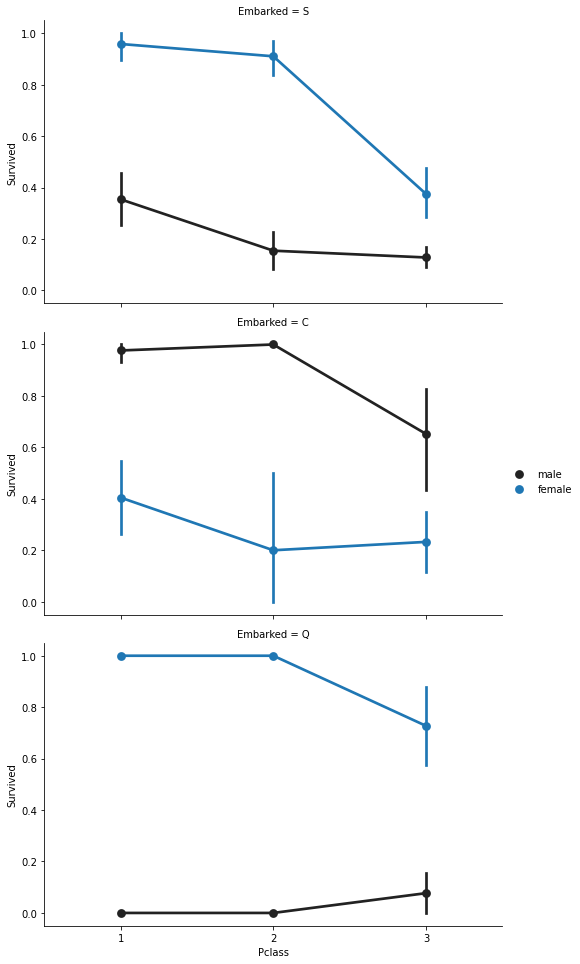

In [8]:
FacetGrid = sb.FacetGrid(df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sb.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

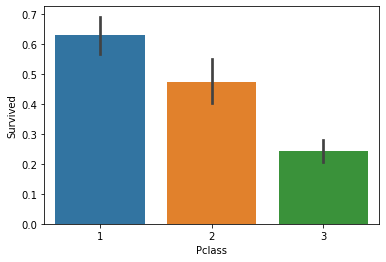

In [9]:
sb.barplot(x='Pclass', y='Survived', data=df)

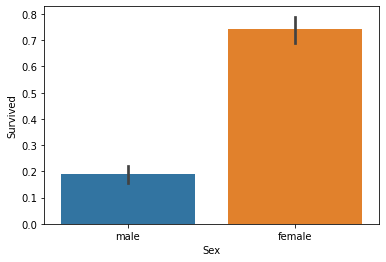

In [10]:
sb.barplot(x='Sex',y='Survived', data = df)

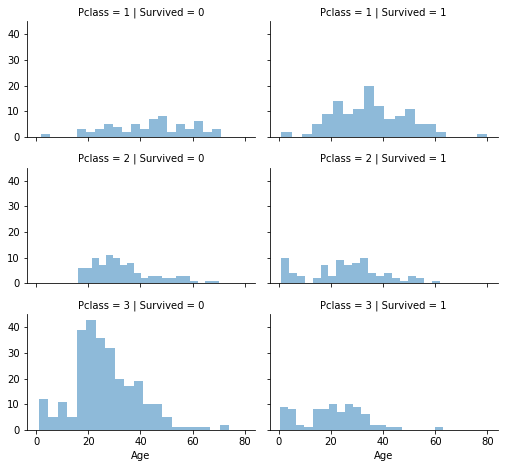

In [11]:
grid = sb.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [12]:
data = [df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
    
df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [13]:
# IN Cabin column there are more than 600 NaN values, It will affect our model, Insted of replacing values we need to drop 
#this column.
df = df.drop(['Cabin'], axis = 1)
df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,4,0


In [14]:
mean_value=df['Age'].median()
print('Mean of values in column Age:')
print(mean_value)

Mean of values in column Age:
28.0


In [15]:
df['Age'].fillna(value=df['Age'].mean(), inplace=True)
print('Updated Dataframe:')
df['Age'].isnull().sum()

Updated Dataframe:


0

In [16]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [17]:
common_value = 'S'
data = [df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [18]:
df['Embarked'].isnull().sum()

0

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
relatives      0
not_alone      0
dtype: int64

In [20]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['Name']= label_encoder.fit_transform(df['Name']) 
df['Name'].unique() 

array([108, 190, 353, 272,  15, 554, 515, 624, 412, 576, 727,  95, 729,
        28, 840, 359, 682, 867, 839, 512, 273,  80, 523, 765, 626,  44,
       240, 260, 605, 813, 828, 776, 289, 856, 535, 372, 505, 134, 837,
       589,   7, 827, 446, 456, 212, 697, 473, 604, 726,  38, 629, 594,
       333, 246, 620, 873, 707, 595, 853, 299, 749, 385, 337, 755, 784,
       560, 596, 185,  25, 440, 396, 300, 376, 161,  87, 546, 778, 563,
       127, 223, 842, 737, 519, 141, 386,  52, 255, 764, 259, 149, 159,
        31, 150, 209, 184, 740, 292, 308, 219, 422, 656, 658, 858, 405,
       312, 542, 724, 559, 675, 552, 667, 882,  67, 417,  46, 645, 178,
       826,  70,  24, 362, 551, 575, 848, 857, 588, 525, 499, 653, 234,
       225, 165, 695, 851, 772, 685, 585, 271, 618, 282,  99, 597, 319,
       116,  32, 586,  29, 254, 580, 121,  68, 643, 532, 889, 612, 866,
       287, 181, 767, 716, 186, 847,  82, 129, 628, 293, 157, 760,  69,
       486, 832, 680, 408, 752, 769, 444, 464, 388, 320, 474, 71

In [21]:
df['Sex']= label_encoder.fit_transform(df['Sex']) 
df['Sex'].unique() 

array([1, 0])

In [22]:
df['Embarked']= label_encoder.fit_transform(df['Embarked']) 
df['Embarked'].unique() 

array([2, 0, 1])

In [23]:
df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [24]:
df = df.drop(['Ticket'], axis=1)

In [25]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int32
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
relatives        int64
not_alone        int32
dtype: object

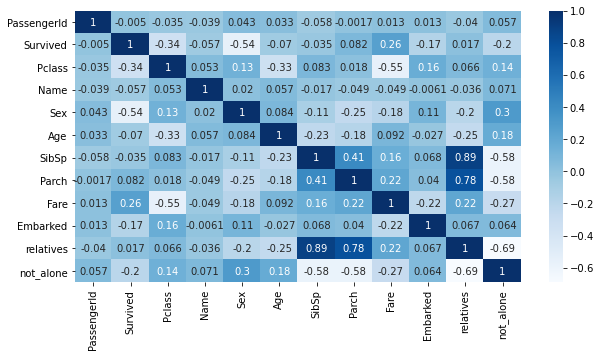

In [26]:
fig=plt.figure(figsize=(10,5))
hc=df.corr(method='pearson')
sb.heatmap(hc,annot=True,cmap="Blues")

In [27]:
df.shape

(891, 12)

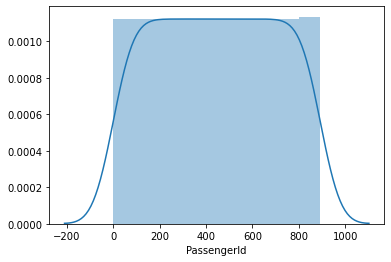

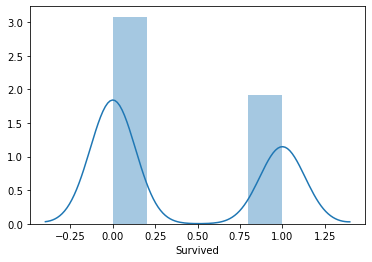

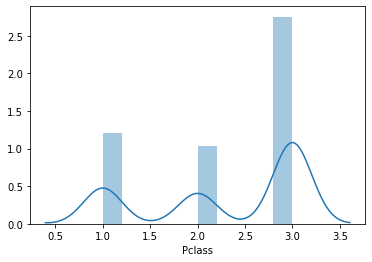

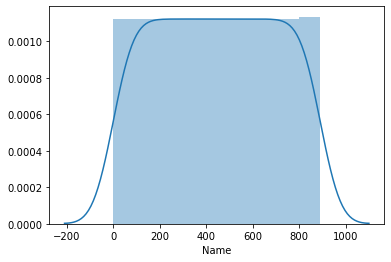

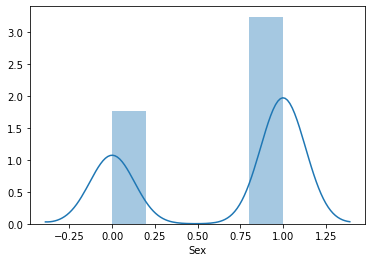

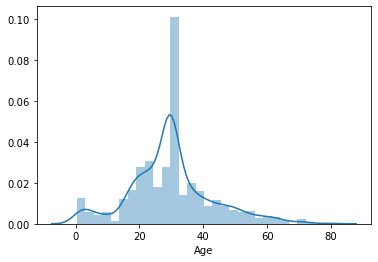

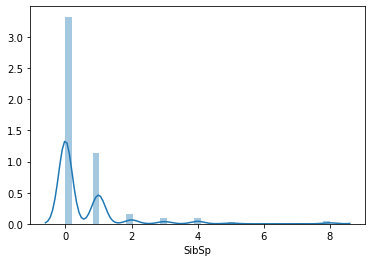

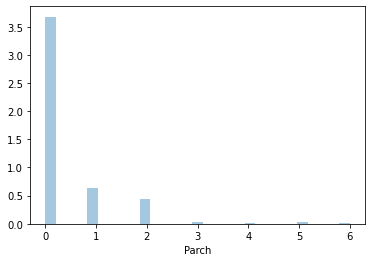

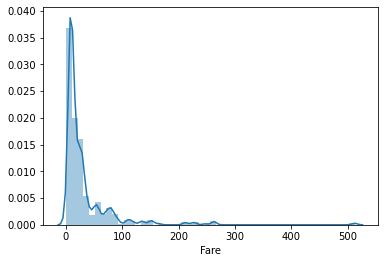

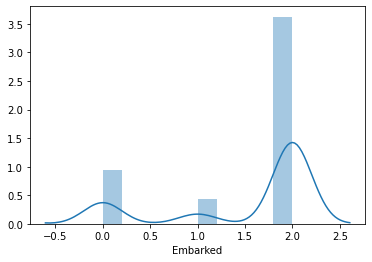

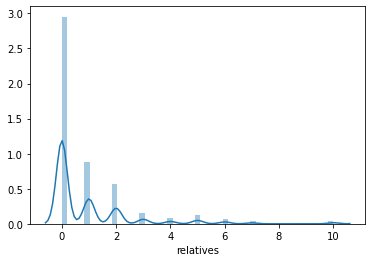

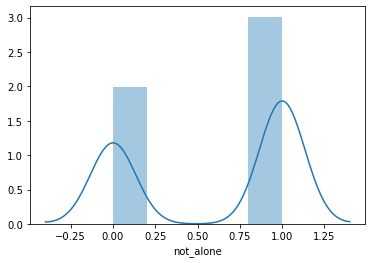

In [28]:
for i in df.columns:
    plt.figure()
    sb.distplot(df[i])

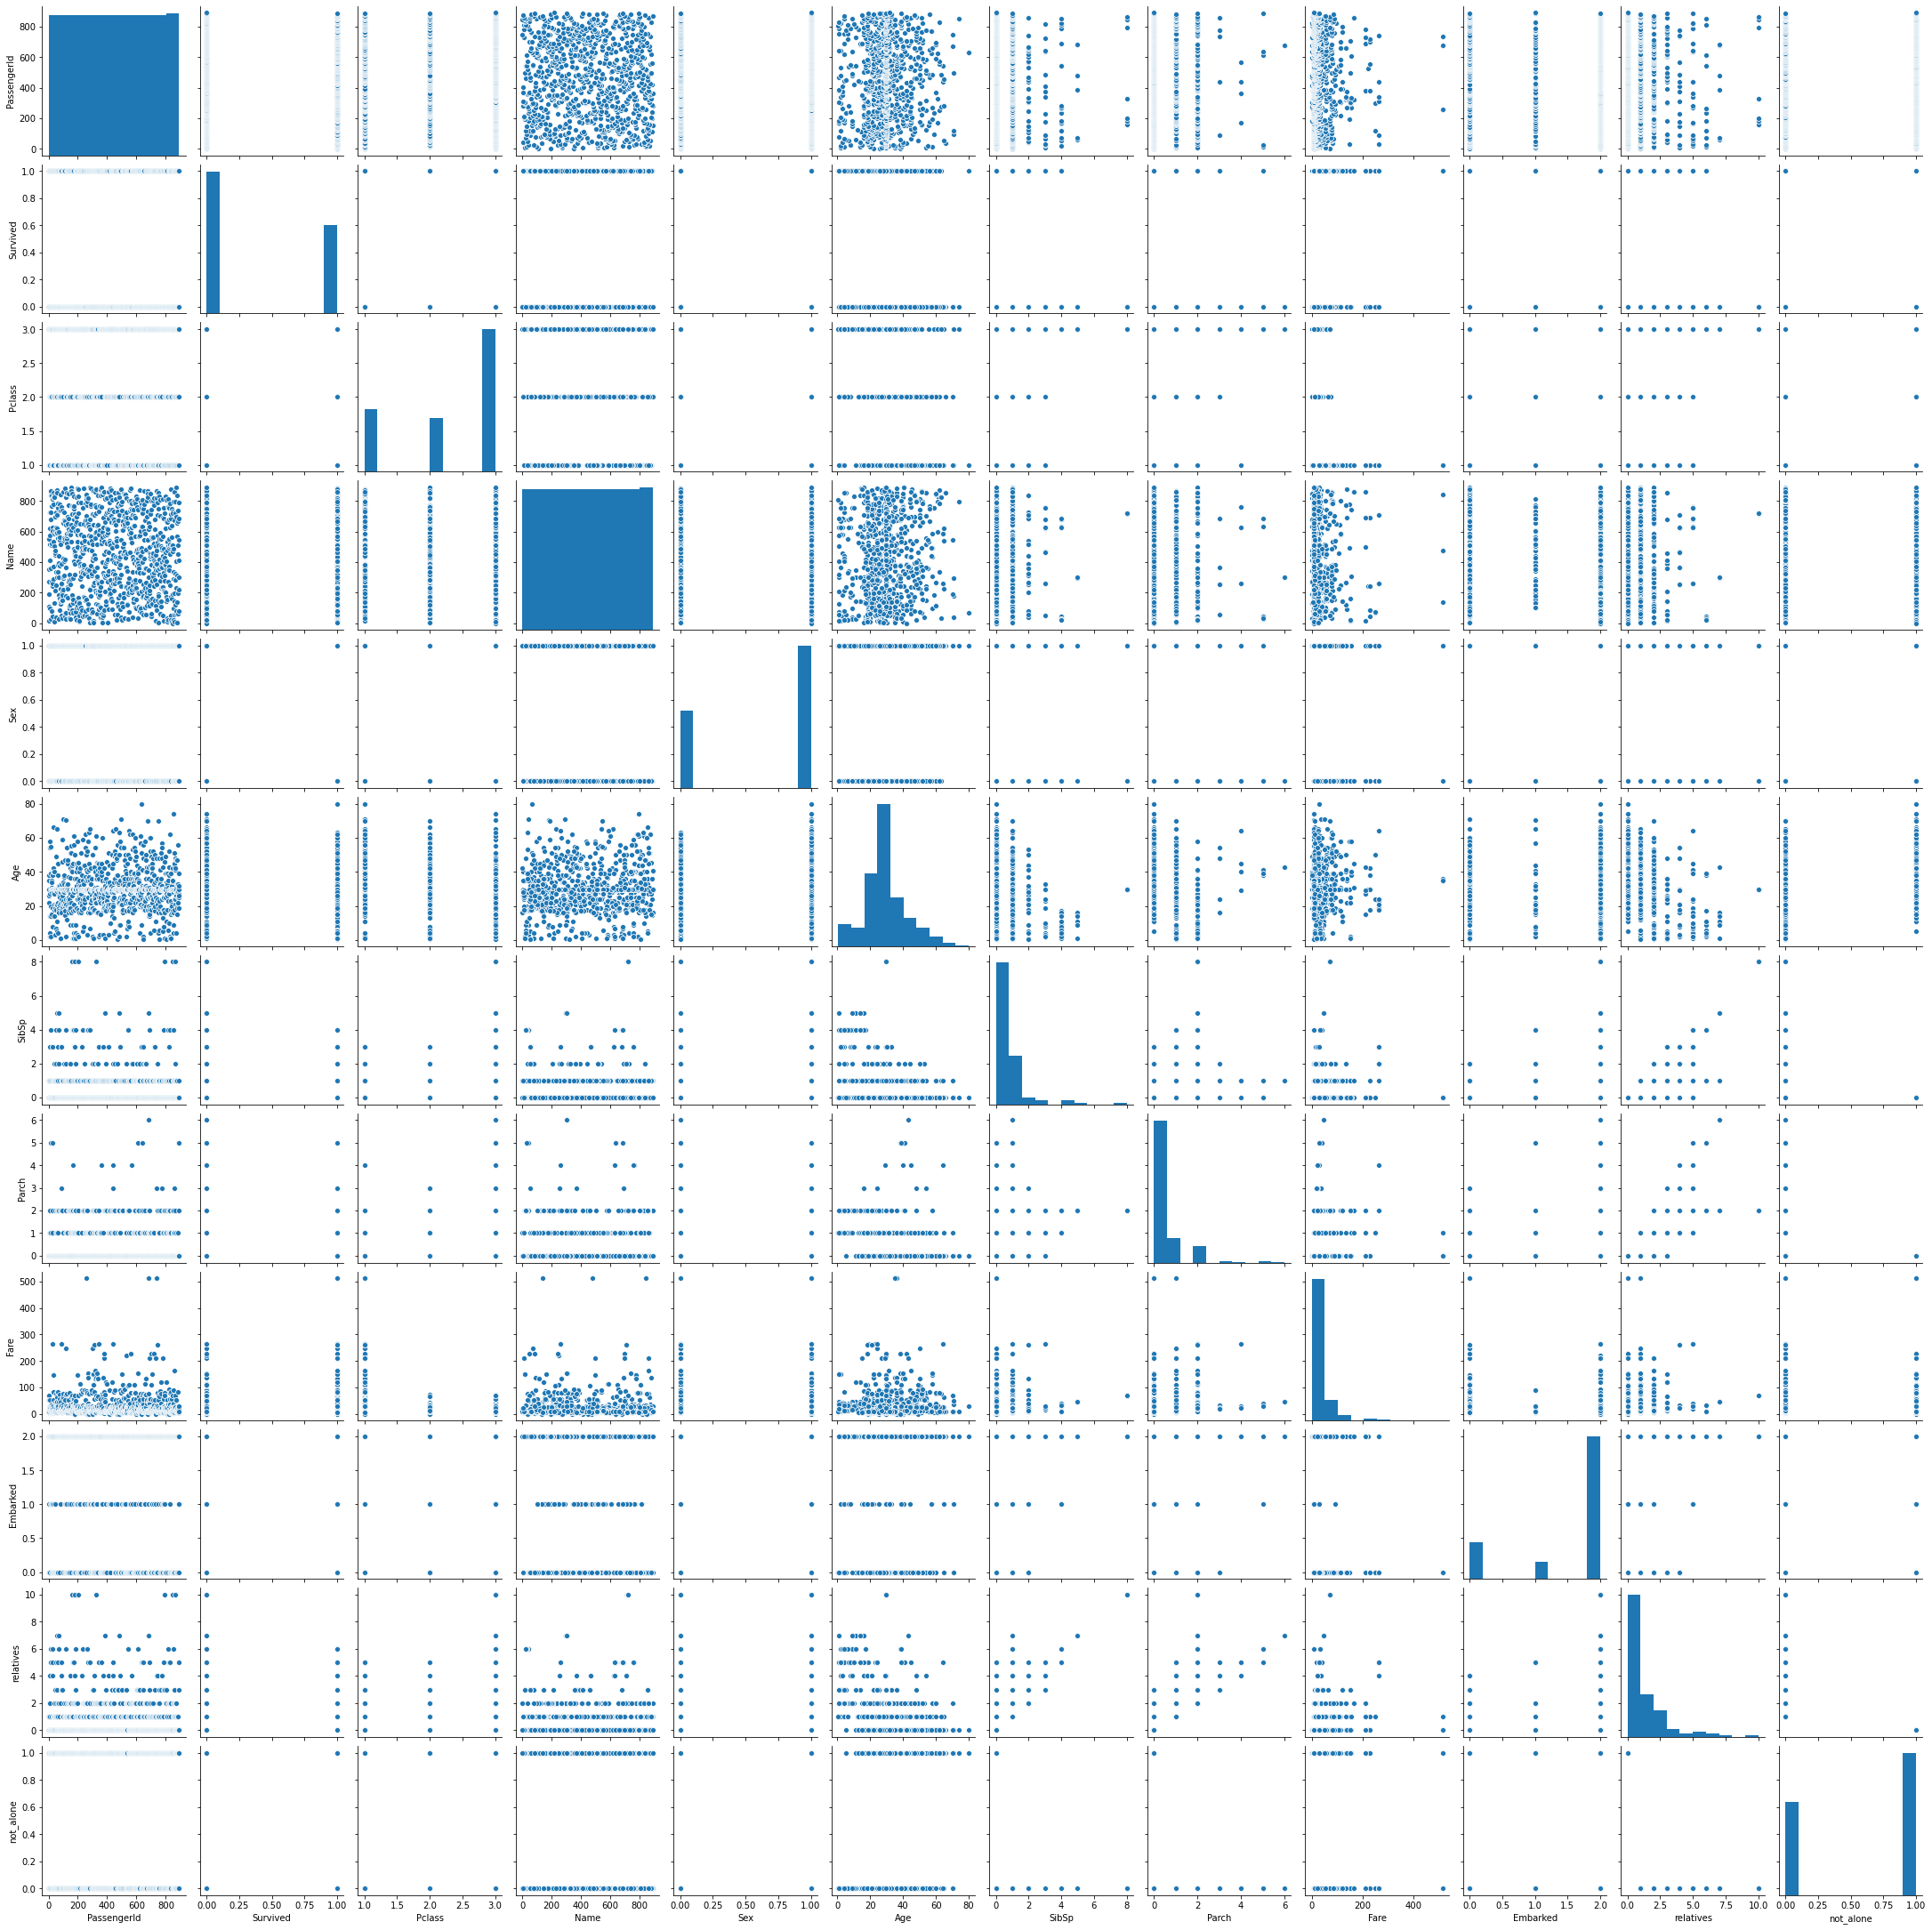

In [29]:
sb.pairplot(df)

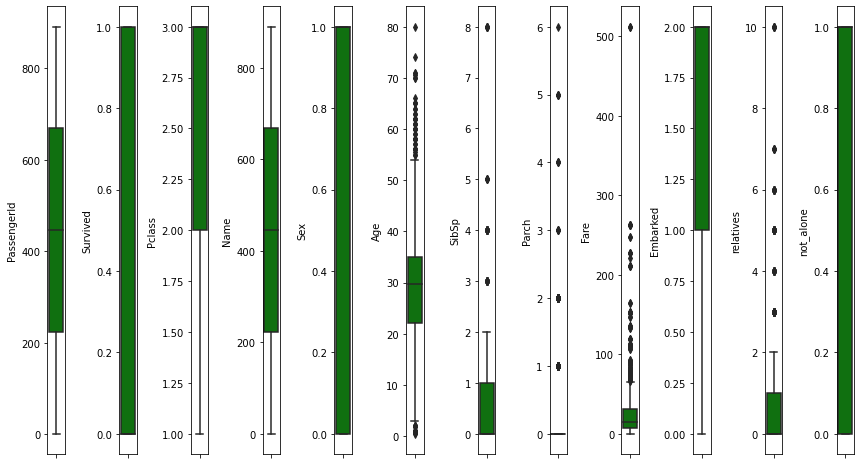

In [30]:
collist = df.columns
ncol = 30
nrows = 14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sb.boxplot(df[collist[i]],color = 'green',orient='v')
    plt.tight_layout()

In [31]:
from scipy.stats import zscore

In [32]:
zscr=np.abs(zscore(df))
thereshold = 3
print(np.where(zscr>3))

(array([ 13,  13,  16,  25,  25,  27,  50,  59,  59,  68,  68,  71,  71,
        86,  88,  96, 116, 118, 119, 119, 159, 159, 164, 167, 171, 180,
       180, 182, 182, 201, 201, 233, 233, 258, 261, 261, 266, 278, 299,
       311, 324, 324, 341, 360, 377, 380, 386, 386, 437, 438, 438, 480,
       480, 493, 527, 541, 541, 542, 542, 557, 567, 610, 610, 630, 638,
       672, 678, 678, 679, 683, 683, 686, 689, 700, 716, 730, 736, 737,
       742, 745, 774, 779, 787, 792, 792, 813, 813, 824, 846, 846, 850,
       850, 851, 858, 863, 863, 885], dtype=int64), array([ 7, 10,  6,  7, 10,  8,  6,  6, 10,  6, 10,  6, 10,  7,  8,  5,  5,
        8,  6, 10,  6, 10,  6,  7,  6,  6, 10,  6, 10,  6, 10,  6, 10,  8,
        6, 10,  6,  6,  8,  8,  6, 10,  8,  7,  8,  8,  6, 10,  7,  7,  8,
        6, 10,  5,  8,  6, 10,  6, 10,  8,  7,  7, 10,  5,  7,  5,  7, 10,
        8,  6, 10,  6,  8,  8,  8,  8,  7,  8,  8,  5,  7,  8,  6,  6, 10,
        6, 10,  6,  6, 10,  6, 10,  5,  7,  6, 10,  7], dtype=int64)

In [33]:
dfnew=df[(zscr<3).all(axis=1)]
dfnew.shape

(820, 12)

In [34]:
loss_perc = (891-820)/891*100

In [35]:
loss_perc

7.968574635241302

In [36]:
df=dfnew

In [37]:
df.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Name           0.010147
Sex           -0.664152
Age            0.318314
SibSp          1.979577
Parch          2.122629
Fare           2.318761
Embarked      -1.277386
relatives      1.730535
not_alone     -0.579988
dtype: float64

In [38]:
x=df.drop(columns=['Survived'])
y=df[['Survived']]

In [39]:
#from sklearn.preprocessing import power_transform
#x=power_transform(x,method='yeo-johnson')

In [40]:
#x

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x)
x1=pd.DataFrame(x1,columns=x.columns)
x1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,-1.743605,0.833995,-1.344994,0.722036,-0.641702,1.051956,-0.451141,-0.623707,0.583162,0.413821,-1.330515
1,-1.739685,-1.586804,-1.022273,-1.384973,0.675821,1.051956,-0.451141,1.525109,-1.953669,0.413821,-1.330515
2,-1.735764,0.833995,-0.380767,-1.384973,-0.312321,-0.563407,-0.451141,-0.601055,0.583162,-0.630282,0.751589
3,-1.731843,-1.586804,-0.699552,-1.384973,0.428785,1.051956,-0.451141,0.914918,0.583162,0.413821,-1.330515
4,-1.727923,0.833995,-1.711007,0.722036,0.428785,-0.563407,-0.451141,-0.596861,0.583162,-0.630282,0.751589
...,...,...,...,...,...,...,...,...,...,...,...
815,1.730122,-0.376405,0.386680,0.722036,-0.229976,-0.563407,-0.451141,-0.430749,0.583162,-0.630282,0.751589
816,1.734043,-1.586804,-0.577548,-1.384973,-0.888737,-0.563407,-0.451141,0.139733,0.583162,-0.630282,0.751589
817,1.737964,0.833995,-0.144629,-1.384973,-0.007717,1.051956,3.088912,-0.080071,0.583162,2.502028,-1.330515
818,1.741884,-1.586804,-1.451256,0.722036,-0.312321,-0.563407,-0.451141,0.139733,-1.953669,-0.630282,0.751589


In [42]:
x.shape

(820, 11)

In [43]:
y.shape

(820, 1)

In [44]:
x.skew()

PassengerId    0.003454
Pclass        -0.632242
Name           0.010147
Sex           -0.664152
Age            0.318314
SibSp          1.979577
Parch          2.122629
Fare           2.318761
Embarked      -1.277386
relatives      1.730535
not_alone     -0.579988
dtype: float64

In [45]:
for i in x.columns:
    if x[i].skew()>0.5:
        x[i]=np.cbrt(x[i])
    if x[i].skew()<-0.5:
        x[i]=np.cbrt(x[i])
        
x.skew()

PassengerId    0.003454
Pclass        -0.790973
Name           0.010147
Sex           -0.664152
Age            0.318314
SibSp          1.018770
Parch          1.643259
Fare           0.708623
Embarked      -1.536414
relatives      0.707184
not_alone     -0.579988
dtype: float64

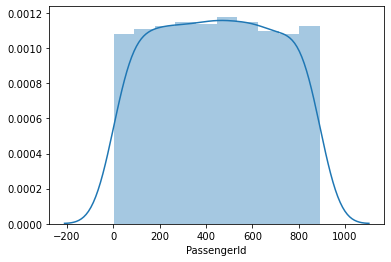

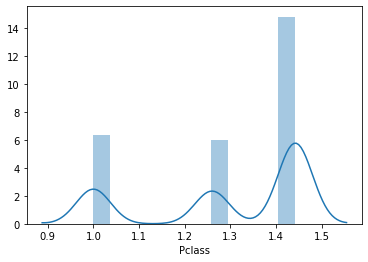

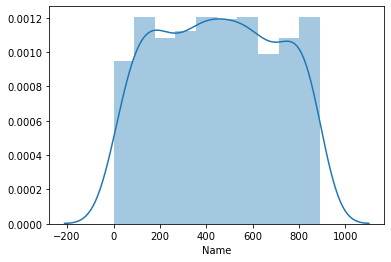

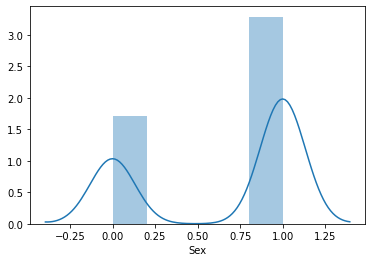

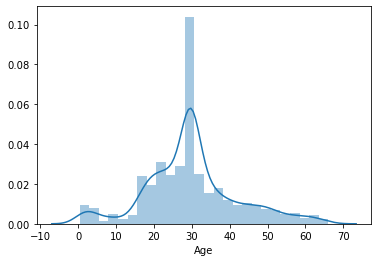

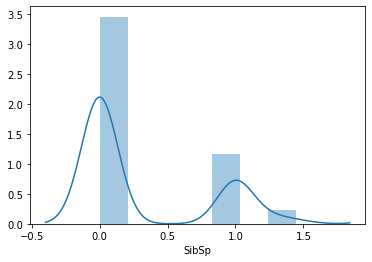

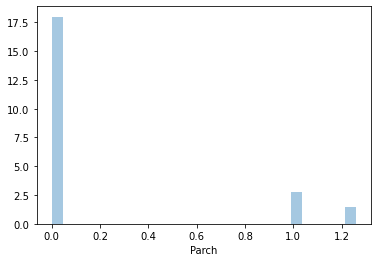

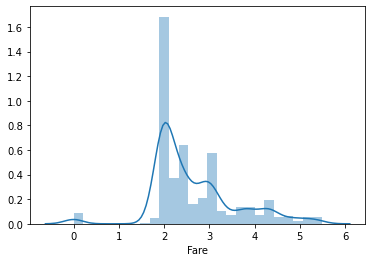

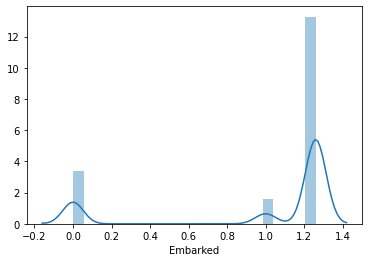

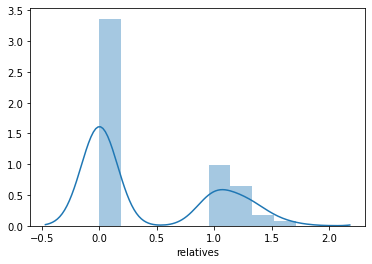

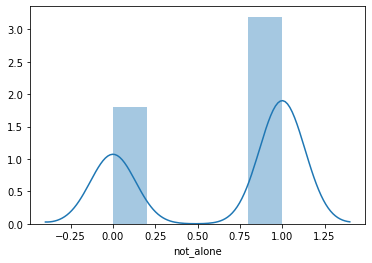

In [46]:
col =x.columns
for i in x[col]:
    plt.figure()
    sb.distplot(x[i])

In [47]:
maxAccu=0
maxRS=0
for i in range (1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predf=LR.predict(x_test)
    accu=accuracy_score(y_test,predf)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
    
print("Best Accu is:",maxAccu,"on RS:",maxRS)

Best Accu is: 0.8839779005524862 on RS: 201


In [48]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=201)

In [49]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy_score:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8839779005524862
[[111   9]
 [ 12  49]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       120
           1       0.84      0.80      0.82        61

    accuracy                           0.88       181
   macro avg       0.87      0.86      0.87       181
weighted avg       0.88      0.88      0.88       181



In [50]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print('accuracy_score:')
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy_score:
0.7955801104972375
[[100  20]
 [ 17  44]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       120
           1       0.69      0.72      0.70        61

    accuracy                           0.80       181
   macro avg       0.77      0.78      0.77       181
weighted avg       0.80      0.80      0.80       181



In [51]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predr=rf.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,predr))
print(confusion_matrix(y_test,predr))
print(classification_report(y_test,predr))

accuracy_score:
0.8950276243093923
[[114   6]
 [ 13  48]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       120
           1       0.89      0.79      0.83        61

    accuracy                           0.90       181
   macro avg       0.89      0.87      0.88       181
weighted avg       0.89      0.90      0.89       181



In [52]:
sv=SVC()
sv.fit(x_train,y_train)
predv=sv.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,predv))
print(confusion_matrix(y_test,predv))
print(classification_report(y_test,predv))

accuracy_score:
0.6629834254143646
[[120   0]
 [ 61   0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.80       120
           1       0.00      0.00      0.00        61

    accuracy                           0.66       181
   macro avg       0.33      0.50      0.40       181
weighted avg       0.44      0.66      0.53       181



In [53]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
preda=ad.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,preda))
print(confusion_matrix(y_test,preda))
print(classification_report(y_test,preda))

accuracy_score:
0.8397790055248618
[[105  15]
 [ 14  47]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       120
           1       0.76      0.77      0.76        61

    accuracy                           0.84       181
   macro avg       0.82      0.82      0.82       181
weighted avg       0.84      0.84      0.84       181



In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt_gini=DecisionTreeClassifier(criterion='gini')
dt_gini.fit(x_train,y_train)
preddt=dt_gini.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

accuracy_score:
0.8176795580110497
[[100  20]
 [ 13  48]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       120
           1       0.71      0.79      0.74        61

    accuracy                           0.82       181
   macro avg       0.80      0.81      0.80       181
weighted avg       0.82      0.82      0.82       181



In [56]:
# cross validtation

model=[rf,gnb,sv,ad,lg,dt_gini]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy_score:',)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())

accuracy_score:
0.8674033149171271
[[110  10]
 [ 14  47]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       120
           1       0.82      0.77      0.80        61

    accuracy                           0.87       181
   macro avg       0.86      0.84      0.85       181
weighted avg       0.87      0.87      0.87       181

[0.79878049 0.81707317 0.85365854 0.81707317 0.82317073]
0.8219512195121951
accuracy_score:
0.7955801104972375
[[100  20]
 [ 17  44]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       120
           1       0.69      0.72      0.70        61

    accuracy                           0.80       181
   macro avg       0.77      0.78      0.77       181
weighted avg       0.80      0.80      0.80       181

[0.62804878 0.71341463 0.75609756 0.75       0.78658537]
0.7268292682926829
accuracy_score:
0.6629834254143646
[[120   0]
 [ 61   0]]
              precis

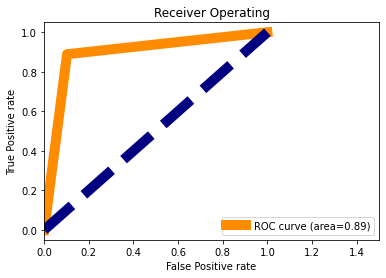

In [57]:
from sklearn.metrics import roc_curve,auc
fpr,trp,thresholds =  roc_curve(predr,y_test)
roc_auc = auc(fpr,trp)

plt.figure()
plt.plot(fpr,trp,color='darkorange',lw=10,label='ROC curve (area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.5])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating')
plt.legend(loc='lower right')
plt.show()

In [60]:
import pickle
filename = 'tatinic.pkl'
pickle.dump(lg,open(filename,'wb'))

In [61]:
loaded_model = pickle.load(open('tatinic.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.8839779005524862
